# 1. Import Library & Data

In [1]:
import h5py
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input, Flatten
from keras import optimizers
import numpy as np

Using TensorFlow backend.


In [3]:
# Load files
def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


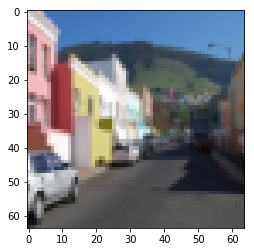

In [4]:
# Example of a picture
index = 1
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0, index]) + ". It's a " + classes[train_y[0, index]].decode("utf-8") + " picture.")

In [5]:
# Standardize data to have feature values between 0 and 1.
train_x = train_x_orig / 255.
test_x = test_x_orig / 255.
train_y = train_y.T
test_y = test_y.T

In [6]:
# Explore your dataset
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]
print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (209, 1)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (50, 1)


# 2. Membuat Model NN
## 2.1 Model pada Keras
## 2.2 Layer pada Keras
### 2.2.1 Sequential Model

In [7]:
model = Sequential([
    Flatten(input_shape=(64,64,3)),
    Dense(20), # data berukuran 12288
    Activation('linear'),
    Dense(7),
    Activation('linear'),
    Dense(5),
    Activation('linear'),
    Dense(1),
    Activation('linear'),
    Dense(1),
    Activation('sigmoid')
])

W0730 12:57:24.819373  7344 deprecation_wrapper.py:119] From C:\Users\labdas.DESKTOP-PR1HO9I\AppData\Roaming\Python\Python35\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0730 12:57:24.889974  7344 deprecation_wrapper.py:119] From C:\Users\labdas.DESKTOP-PR1HO9I\AppData\Roaming\Python\Python35\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 12:57:24.903939  7344 deprecation_wrapper.py:119] From C:\Users\labdas.DESKTOP-PR1HO9I\AppData\Roaming\Python\Python35\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



### 2.2.2 Functional API Model

In [8]:
input_func = Input(shape=(64,64,3))
flatten = Flatten(input_shape=(64,64,3))(input_func)
dense_1 = Dense(20, activation="linear")(flatten)
dense_2 = Dense(7, activation="linear")(dense_1)
dense_3 = Dense(5, activation="linear")(dense_2)
dense_4 = Dense(1, activation="linear")(dense_3)
dense_5 = Dense(1, activation="sigmoid")(dense_4)
model = Model(inputs=input_func, outputs=dense_5)

In [10]:
sgd = optimizers.SGD(lr=0.00075, decay=0, momentum=0.9)
model.compile(optimizer=sgd, loss="binary_crossentropy", metrics=["accuracy"])

W0730 12:59:16.792119  7344 deprecation_wrapper.py:119] From C:\Users\labdas.DESKTOP-PR1HO9I\AppData\Roaming\Python\Python35\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0730 12:59:16.796109  7344 deprecation.py:323] From c:\program files\python35\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# 3. Training Model Keras

In [11]:
model.fit(train_x, train_y, epochs=200, verbose=1)

W0730 12:59:37.787414  7344 deprecation_wrapper.py:119] From C:\Users\labdas.DESKTOP-PR1HO9I\AppData\Roaming\Python\Python35\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/200
209/209 [==============================] - 1s 3ms/step - loss: 0.8221 - acc: 0.6077
Epoch 2/200
209/209 [==============================] - 0s 272us/step - loss: 0.9256 - acc: 0.5167
Epoch 3/200
209/209 [==============================] - 0s 396us/step - loss: 0.7939 - acc: 0.6077
Epoch 4/200
209/209 [==============================] - 0s 264us/step - loss: 0.5837 - acc: 0.6890
Epoch 5/200
209/209 [==============================] - 0s 267us/step - loss: 0.6570 - acc: 0.6555
Epoch 6/200
209/209 [==============================] - 0s 377us/step - loss: 0.5765 - acc: 0.7368
Epoch 7/200
209/209 [==============================] - 0s 272us/step - loss: 0.4786 - acc: 0.7656
Epoch 8/200
209/209 [==============================] - 0s 286us/step - loss: 0.5215 - acc: 0.7464
Epoch 9/200
209/209 [==============================] - 0s 339us/step - loss: 0.4358 - acc: 0.7990
Epoch 10/200
209/209 [==============================] - 0s 272us/step - loss: 0.4500 - acc: 0.7751
Epoch 11/200
209/209 

209/209 [==============================] - 0s 339us/step - loss: 0.2019 - acc: 0.9043
Epoch 84/200
209/209 [==============================] - 0s 439us/step - loss: 0.1771 - acc: 0.9234
Epoch 85/200
209/209 [==============================] - 0s 305us/step - loss: 0.1230 - acc: 0.9522
Epoch 86/200
209/209 [==============================] - 0s 305us/step - loss: 0.0602 - acc: 0.9904
Epoch 87/200
209/209 [==============================] - 0s 358us/step - loss: 0.0378 - acc: 0.9952
Epoch 88/200
209/209 [==============================] - 0s 477us/step - loss: 0.0333 - acc: 0.9952
Epoch 89/200
209/209 [==============================] - 0s 363us/step - loss: 0.0489 - acc: 0.9856
Epoch 90/200
209/209 [==============================] - 0s 325us/step - loss: 0.0406 - acc: 0.9904
Epoch 91/200
209/209 [==============================] - 0s 286us/step - loss: 0.0368 - acc: 1.0000
Epoch 92/200
209/209 [==============================] - 0s 272us/step - loss: 0.0224 - acc: 1.0000
Epoch 93/200
209/209 [=

209/209 [==============================] - 0s 339us/step - loss: 0.0039 - acc: 1.0000
Epoch 165/200
209/209 [==============================] - 0s 291us/step - loss: 0.0039 - acc: 1.0000
Epoch 166/200
209/209 [==============================] - 0s 420us/step - loss: 0.0038 - acc: 1.0000
Epoch 167/200
209/209 [==============================] - 0s 282us/step - loss: 0.0044 - acc: 1.0000
Epoch 168/200
209/209 [==============================] - 0s 286us/step - loss: 0.0044 - acc: 1.0000
Epoch 169/200
209/209 [==============================] - 0s 282us/step - loss: 0.0047 - acc: 1.0000
Epoch 170/200
209/209 [==============================] - 0s 353us/step - loss: 0.0037 - acc: 1.0000
Epoch 171/200
209/209 [==============================] - 0s 344us/step - loss: 0.0037 - acc: 1.0000
Epoch 172/200
209/209 [==============================] - 0s 286us/step - loss: 0.0036 - acc: 1.0000
Epoch 173/200
209/209 [==============================] - 0s 363us/step - loss: 0.0035 - acc: 1.0000
Epoch 174/200


# 4. Evaluasi Model Keras

In [12]:
model.evaluate(test_x, test_y)

50/50 [==============================] - 0s 2ms/step


[2.042358150482178, 0.6800000071525574]

In [13]:
res = model.predict(test_x)
res = np.apply_along_axis(lambda x: x >= 0.5, 0, res)

(-0.5, 63.5, 63.5, -0.5)

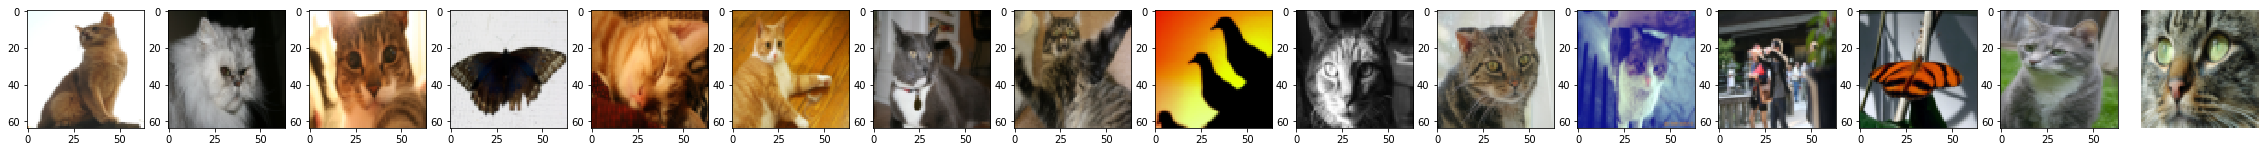

In [15]:
a = res + test_y
mislabeled_indices = np.asarray(np.where(a==1))
plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
num_images = len(mislabeled_indices[0])
for i in range(num_images):
    index = mislabeled_indices[0][i]
    plt.subplot(2, num_images, i + 1)
    plt.imshow(test_x[index].reshape(64,64,3), interpolation='nearest')
plt.axis('off')